# Курсовая работа. Технологии машинного обучения. Ануров Никита РТ5-61

# 1.Выбор надобра данных для построения моделей машинного обучения.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

%matplotlib inline 

In [8]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [9]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('understat_per_game.csv')

# 2.Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков данных.

In [10]:
df_test.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Ligue_1,2019,a,1.514670,1.124190,0.754575,1.124190,3,2,2,...,14.727273,324,22,10.952381,230,21,Marseille,-0.485330,0.124190,-1.2568
1,Ligue_1,2019,h,2.561580,1.170330,1.801490,1.170330,11,2,0,...,8.827586,256,29,10.227273,225,22,Montpellier,2.561580,0.170330,2.3471
2,Ligue_1,2019,a,0.683431,0.785876,0.683431,0.785876,5,1,1,...,10.297297,381,37,6.700000,134,20,Montpellier,-0.316569,-0.214124,0.2503
3,Ligue_1,2019,h,1.891860,1.042850,1.131760,1.042850,7,2,1,...,14.368421,273,19,17.705882,301,17,Montpellier,0.891860,1.042850,-0.9508
4,Ligue_1,2019,a,0.767321,0.825226,0.767321,0.825226,6,3,0,...,12.714286,267,21,12.115385,315,26,Montpellier,0.767321,-0.174774,1.2657


In [11]:
df_train.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


In [12]:
df_test.shape,df_train.shape

((7383, 29), (15953, 29))

In [13]:
df_train.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [14]:
df_test.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [15]:
df_train.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

In [16]:
df_test.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

In [17]:
df_train.isnull().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64

In [18]:
df_test.isnull().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64

Ни тестовая, ни обучающая выборки не содержат пропусков. Построим графики

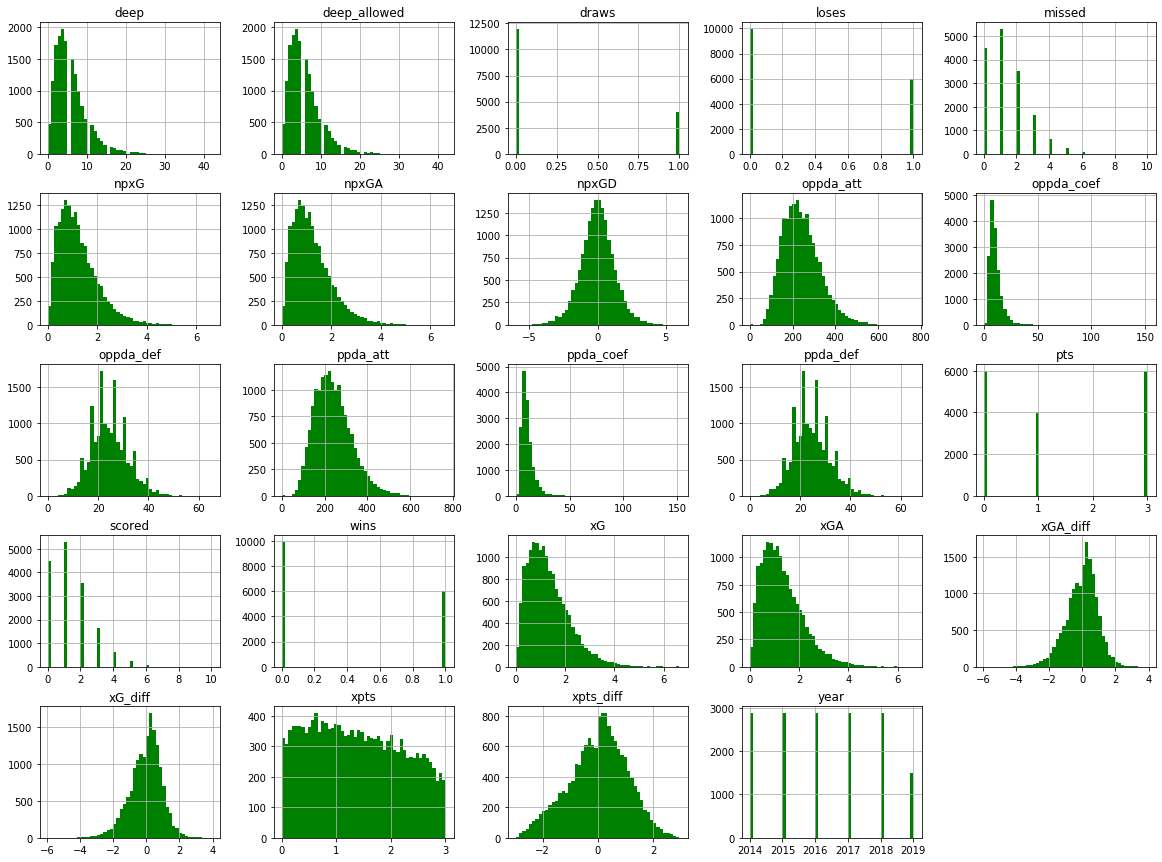

In [19]:
df_train.hist(bins=50, figsize=(20,15), color='g')
plt.show()

In [20]:
df_train['wins'].unique()

array([1, 0], dtype=int64)

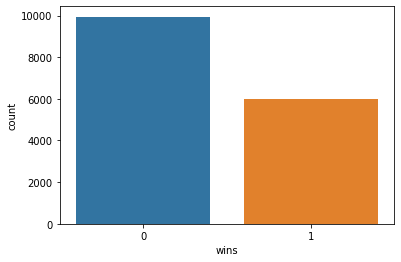

In [82]:
sns.countplot(df_train['wins'])

In [22]:
df_train['wins'].value_counts()

0    9944
1    6009
Name: wins, dtype: int64

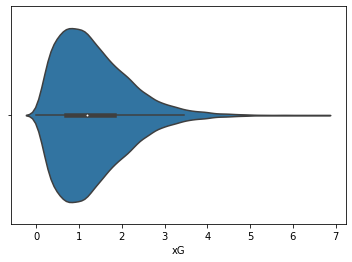

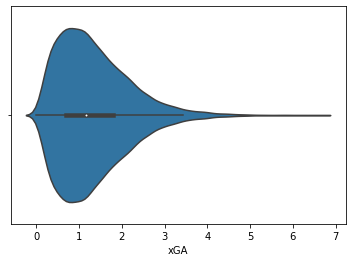

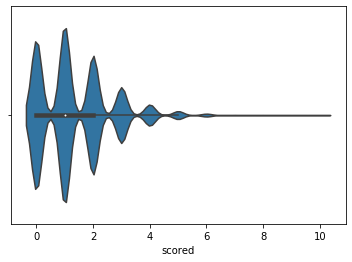

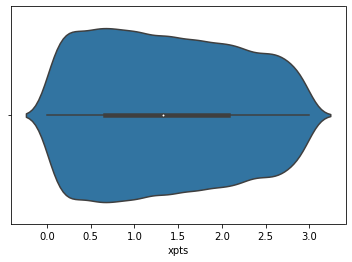

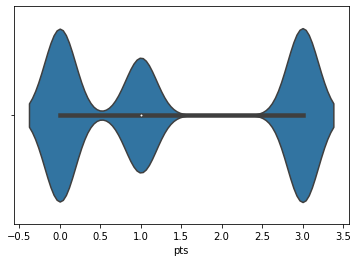

In [23]:
for col in[ 'xG', 'xGA', 'scored',  'xpts',  'pts']:
    sns.violinplot(x=df_train[col])
    plt.show()

# 3.Выбор пизнаков, подохдящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [24]:
df_train.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

Для построения моделей выберем следующие признаки: 'xG', 'xGA', 'scored',  'xpts',  'pts'.
Потому что остальные признаки не так важны при определении победы.

Выполним масштабирование данных, а для этого объединим тестовую и обучающую выборки.

In [45]:
# Добавим колонку для последующего разделения.
df_train['data']='TRAIN'
df_test['data']='TEST'

In [46]:
#Колонки для объединения
join_cols=['xG', 'xGA', 'scored',  'xpts',  'pts','wins' ,'data']

In [47]:
df_all=pd.concat([df_train[join_cols], df_test[join_cols]])

In [48]:
assert df_all.shape[0]==df_train.shape[0]+df_test.shape[0]

In [49]:
df_all.head()

,xG,xGA,scored,xpts,pts,wins,data
0,2.57012,1.198420,2,2.3486,3,1,TRAIN
1,1.50328,1.307950,1,1.5143,1,0,TRAIN
2,1.22987,0.310166,2,2.1588,3,1,TRAIN
3,1.03519,0.203118,0,2.1367,1,0,TRAIN
4,3.48286,0.402844,4,2.9287,3,1,TRAIN


In [30]:
df_all.shape

(23336, 7)

In [31]:
# Числовые колонки для масштабирования
scale_cols = ['xG', 'xGA', 'scored',  'xpts',  'pts']

In [32]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df_all[scale_cols])

In [33]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    df_all[new_col_name] = sc1_data[:,i]

In [34]:
df_all.head()

,xG,xGA,scored,xpts,pts,wins,data,xG_scaled,xGA_scaled,scored_scaled,xpts_scaled,pts_scaled
0,2.57012,1.198420,2,2.3486,3,1,TRAIN,0.387621,0.180744,0.2,0.782867,1.000000
1,1.50328,1.307950,1,1.5143,1,0,TRAIN,0.226722,0.197263,0.1,0.504767,0.333333
2,1.22987,0.310166,2,2.1588,3,1,TRAIN,0.185487,0.046779,0.2,0.719600,1.000000
3,1.03519,0.203118,0,2.1367,1,0,TRAIN,0.156126,0.030634,0.0,0.712233,0.333333
4,3.48286,0.402844,4,2.9287,3,1,TRAIN,0.525279,0.060756,0.4,0.976233,1.000000


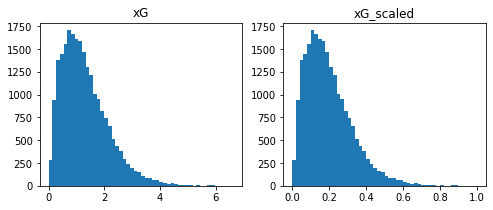

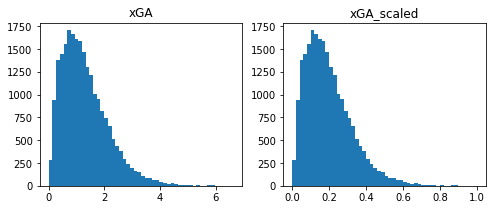

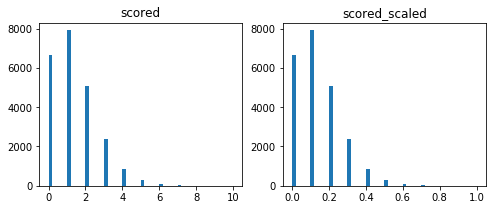

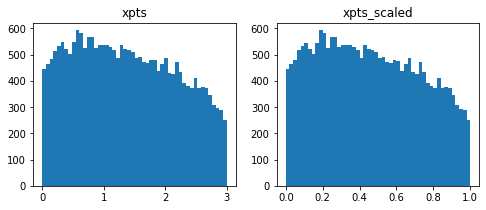

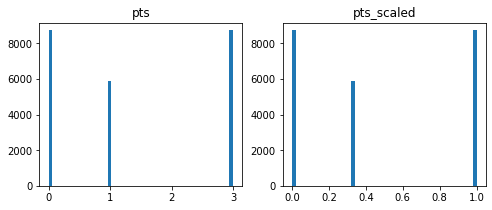

In [35]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(df_all[col], 50)
    ax[1].hist(df_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# 4.Проведение корреляционного анализа данных.

In [36]:
corr_cols_1 = scale_cols + ['wins']
corr_cols_1

['xG', 'xGA', 'scored', 'xpts', 'pts', 'wins']

In [37]:
scale_cols_pf = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_pf + ['wins']
corr_cols_2

['xG_scaled',
 'xGA_scaled',
 'scored_scaled',
 'xpts_scaled',
 'pts_scaled',
 'wins']

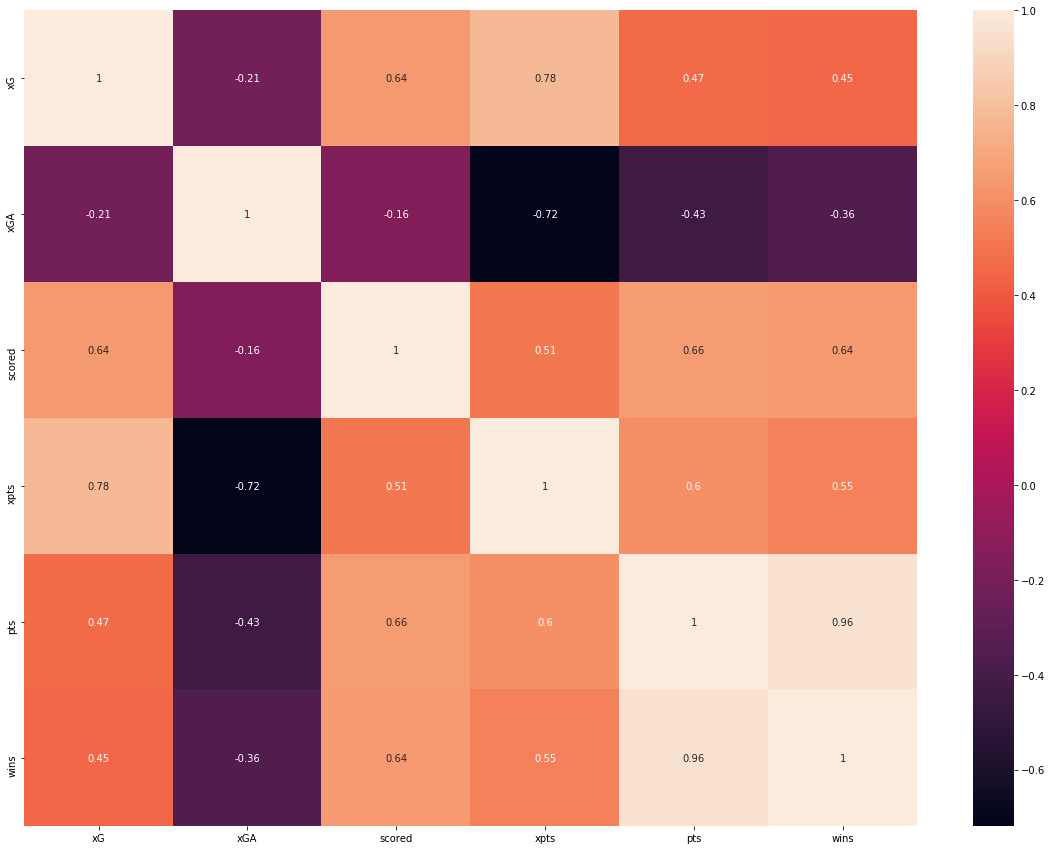

In [38]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_all[corr_cols_1].corr(),annot=True);

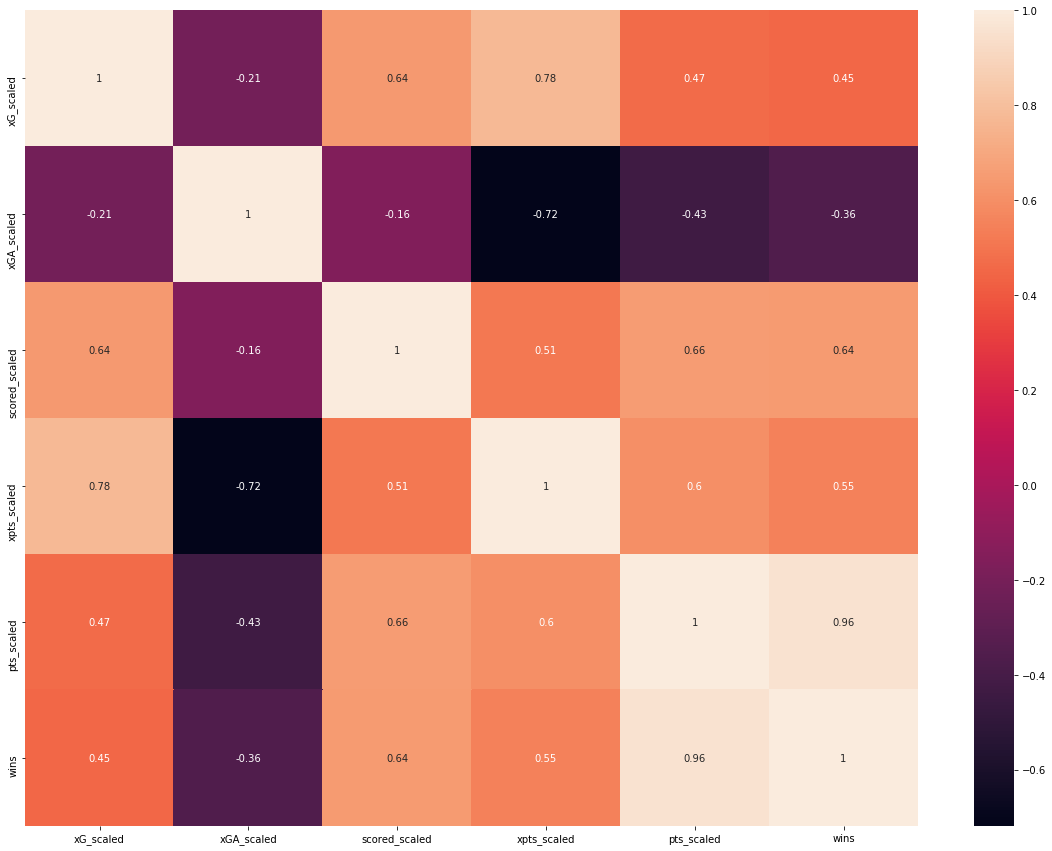

In [39]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_all[corr_cols_2].corr(),annot=True);

# 5.Выбор метрик для последующей оценки качества моделей.

### 1. Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

precision=TPTP+FP
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

### 2. Метрика recall(полнота):

recall=TPTP+FN
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

### 3. Метрика F1-мера

Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall:

Fβ=(1+β2)⋅precision⋅recallprecision+recall
где β определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при β=1:

F1=2⋅precision⋅recallprecision+recall
Для вычисления используется функция f1_score.

### 4. Метрика ROC AUC

Основана на вычислении следующих характеристик:

TPR=TPTP+FN - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FPFP+TN - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

In [50]:
class MetricLogger:    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

# 6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

# 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [93]:
train=df_all[df_all['data']=="TRAIN"]
test=df_all[df_all['data']=='TEST']
train.shape,test.shape

((15953, 7), (7383, 7))

In [94]:
task_cols=['scored', 'xpts']

In [89]:
X_train=train[task_cols]
X_test=test[task_cols]
Y_train=train['wins']
Y_test=test['wins']
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15953, 2), (7383, 2), (15953,), (7383,))

# 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [90]:
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [95]:
clasMetricLogger = MetricLogger()

def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, X_test, Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


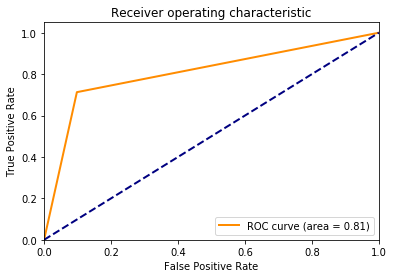

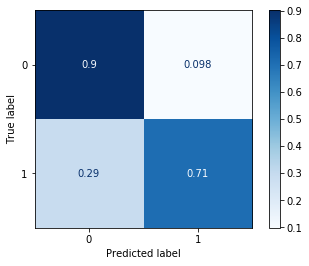

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


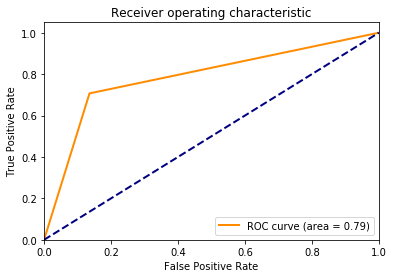

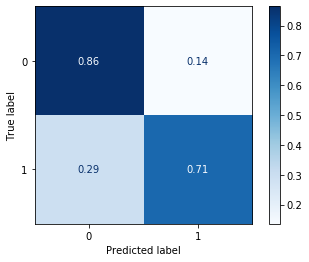

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


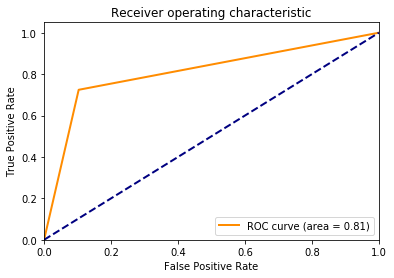

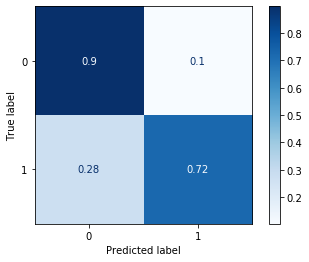

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


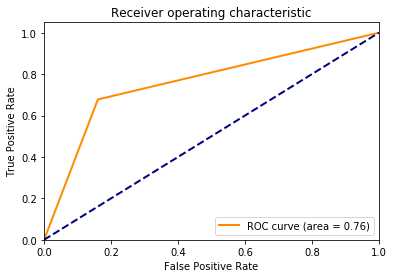

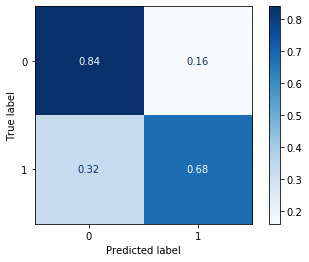

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


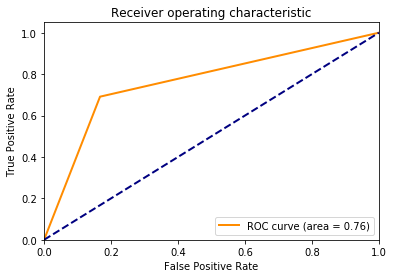

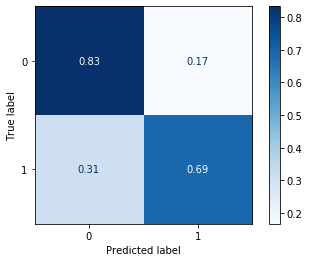

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


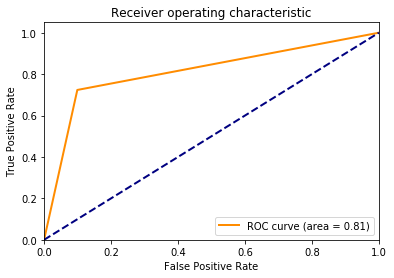

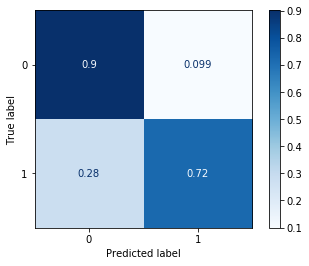

In [96]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

# 9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [72]:
X_train.shape

(15953, 2)

In [73]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [74]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, Y_train)

Wall time: 1min 15s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [75]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=301, p=2,
                     weights='uniform')

In [76]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 301}

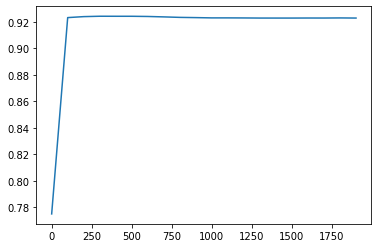

In [77]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])


# 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [78]:
clas_models_grid = {'KNN_301':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=301, p=2,
                     weights='uniform')
*****************************************************


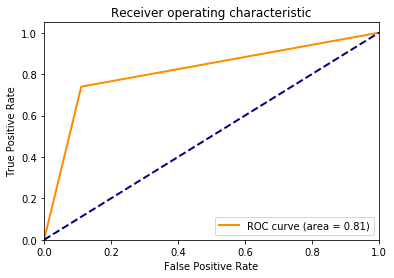

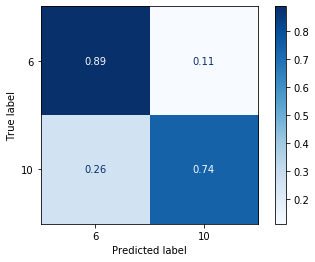

In [79]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [80]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

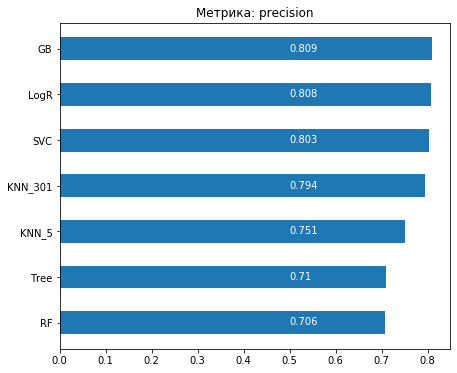

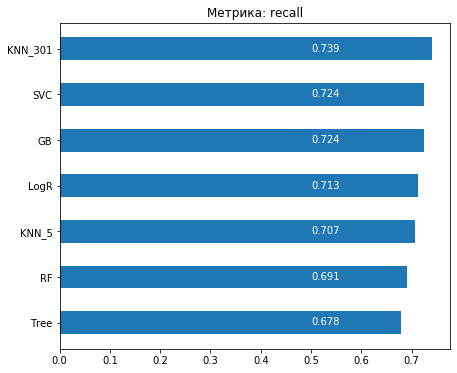

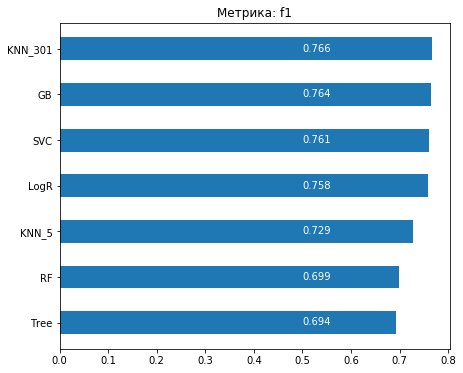

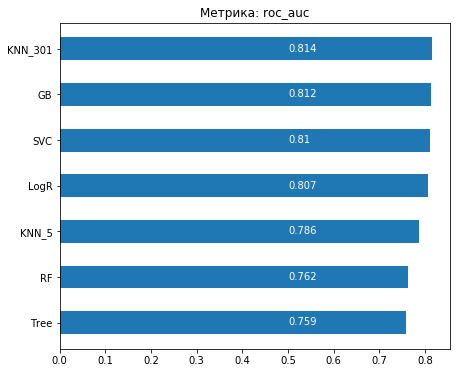

In [81]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

#### Вывод: на основании трех метрик из четырех используемых, лучшей оказалась модель метода ближайшего соседа.